In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

In [3]:
print(tf.__version__)

2.15.0


In [4]:
(X_train,y_train), (X_test,y_test)= mnist.load_data()

In [5]:
X_train= X_train/255
X_test= X_test/255

In [9]:
input_shape=(28, 28, 1)
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))



model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 96)          55392     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 96)         

In [11]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics='accuracy')

In [12]:
history= model.fit(X_train, y_train,epochs=10,verbose='auto',validation_split=0.2,use_multiprocessing=True)

Epoch 1/10


1500/1500 [==============================] - 16s 8ms/step - loss: 0.2404 - accuracy: 0.9225 - val_loss: 0.0979 - val_accuracy: 0.9722
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0809 - accuracy: 0.9749 - val_loss: 0.0764 - val_accuracy: 0.9773
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0492 - val_accuracy: 0.9865
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0515 - val_accuracy: 0.9841
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0507 - val_accuracy: 0.9852
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0473 - val_

In [13]:
Loss, Accuracy =model.evaluate(X_test, y_test)
print("Test Loss:", Loss)
print("Test Accuracy:", Accuracy )


313/313 [==============================] - 1s 4ms/step - loss: 0.0561 - accuracy: 0.9868
Test Loss: 0.056090015918016434
Test Accuracy: 0.9868000149726868


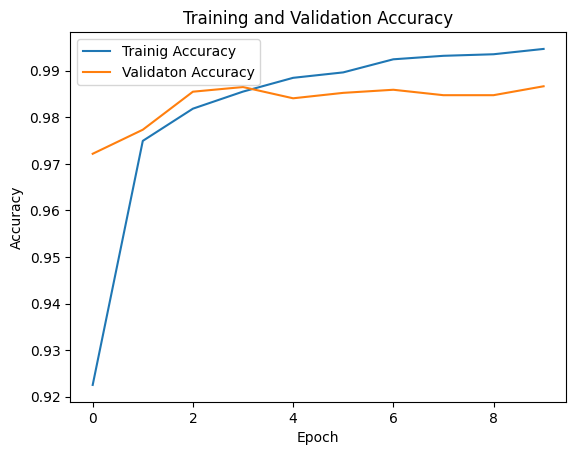

In [14]:
plt.plot(history.history['accuracy'], label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'],label='Validaton Accuracy')
# Adding labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding a legend to the plot
plt.legend()

# Display the plot
plt.show()


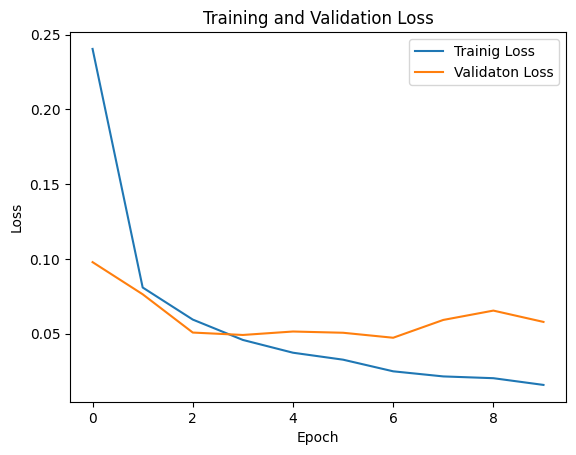

In [15]:
plt.plot(history.history['loss'], label='Trainig Loss')
plt.plot(history.history['val_loss'],label='Validaton Loss')
# Adding labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [16]:
y_pred= model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


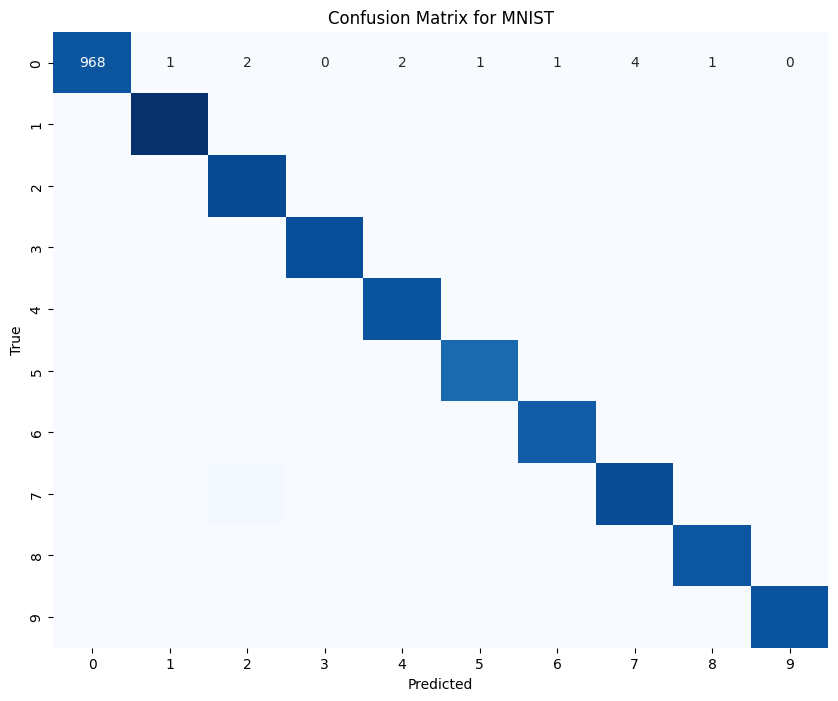

In [17]:
from sklearn.metrics import confusion_matrix
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test


cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MNIST')
plt.show()

Model Testing:

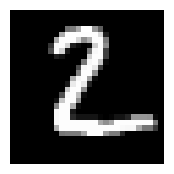

Predicted Label: 2


In [18]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[1],cmap='gray')
plt.axis('off')
plt.show()
predicted_label=y_pred[1].argmax()
print('Predicted Label:',predicted_label)

313/313 [==============================] - 1s 3ms/step


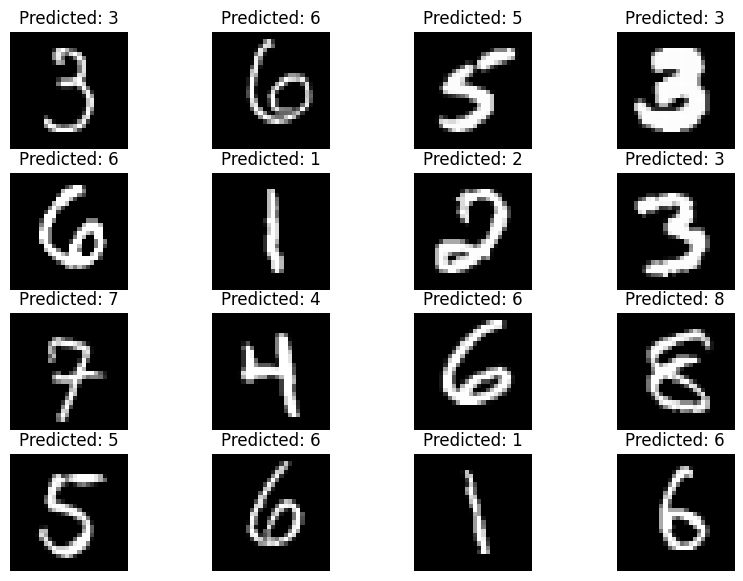

In [19]:
predictions = model.predict(X_test)

image_indices = [1503, 100, 155,200,886,302,400,500,
                 550,295,384,1202,1521,2002,2504,3000]


plt.figure(figsize=(10, 7))
for i, index in enumerate(image_indices, 1):
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index], cmap='gray')
    plt.axis('off')
    predicted_label = predictions[index].argmax()
    plt.title(f'Predicted: {predicted_label}')

plt.show()


In [20]:
# Assuming your model is stored in a variable named 'model'
model.save('mnist_mode.h5')

C:\Users\Shorya Sharma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
